# Title: Global plastic usage: future impact awareness

##  EDA, PCA & ML


### Introduction

This report undertakes the identification of critical issues associated with global plastic usage. The pervasive problem of plastic consumption unfolds as a multidimensional crisis demanding immediate attention. With each passing day, the escalating reliance on plastic exacerbates, posing severe consequences for the environment and future generations

## Import Libraries

Imported libraries are assigned abbreviated formats, facilitating faster recall and utilization

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

#### Importing Dataset

In [3]:
GB_df =pd.read_csv ("per-capita-plastic-waste-vs-gdp-per-capita.csv")

## Exploratory Data Analysis (EDA)

In [4]:
GB_df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


Size of the dataset : In this section i have identified the size of the dataset using the follow code below: Dataset size: (48168, 7)

In [5]:
GB_df.shape

(48168, 7)

In [6]:
GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [7]:
GB_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,48168.0,1.903147e+03,3.157168e+02,-10000.00000,1859.000000,1.920000e+03,1.975000e+03,2.019000e+03
Per capita plastic waste (kg/person/day),186.0,1.798118e-01,1.230064e-01,0.01000,0.103000,1.440000e-01,2.520000e-01,6.860000e-01
"GDP per capita, PPP (constant 2011 international $)",6407.0,1.492610e+04,1.773975e+04,247.43654,3021.071807,8.447264e+03,1.960754e+04,1.353188e+05
"Total population (Gapminder, HYDE & UN)",46883.0,2.982790e+07,2.530860e+08,905.00000,201733.500000,1.542937e+06,5.886795e+06,7.713468e+09


As there are many "NaN" values identified above, a quick look at the target variable's unique values will highlight if there are any "na" values in this target variable.

In [8]:
GB_df["Entity"].unique()

array(['Abkhazia', 'Afghanistan', 'Africa', 'Akrotiri and Dhekelia',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Arab World',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Austria-Hungary', 'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Bavaria', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean small states',
       'Cayman Islands', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Christmas Island', 'Cocos Islands', 'Colombia',
       'Comor

Below, some variables are picked at random to investigate their unique values in order to reveal the most recurring missing value abbreviation used and whether there are any other string values present.

In [9]:
GB_df["Year"].unique()

array([  2015,   2002,   2003,   2004,   2005,   2006,   2007,   2008,
         2009,   2010,   2011,   2012,   2013,   2014,   2016,   2017,
         1800,   1801,   1802,   1803,   1804,   1805,   1806,   1807,
         1808,   1809,   1810,   1811,   1812,   1813,   1814,   1815,
         1816,   1817,   1818,   1819,   1820,   1821,   1822,   1823,
         1824,   1825,   1826,   1827,   1828,   1829,   1830,   1831,
         1832,   1833,   1834,   1835,   1836,   1837,   1838,   1839,
         1840,   1841,   1842,   1843,   1844,   1845,   1846,   1847,
         1848,   1849,   1850,   1851,   1852,   1853,   1854,   1855,
         1856,   1857,   1858,   1859,   1860,   1861,   1862,   1863,
         1864,   1865,   1866,   1867,   1868,   1869,   1870,   1871,
         1872,   1873,   1874,   1875,   1876,   1877,   1878,   1879,
         1880,   1881,   1882,   1883,   1884,   1885,   1886,   1887,
         1888,   1889,   1890,   1891,   1892,   1893,   1894,   1895,
      

In [10]:
GB_df["Continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'Antarctica', 'South America'], dtype=object)

In [11]:
GB_df["Per capita plastic waste (kg/person/day)"].unique()

array([  nan, 0.069, 0.144, 0.062, 0.252, 0.66 , 0.183, 0.112, 0.39 ,
       0.132, 0.034, 0.57 , 0.08 , 0.172, 0.043, 0.165, 0.026, 0.154,
       0.066, 0.046, 0.093, 0.065, 0.119, 0.121, 0.201, 0.258, 0.103,
       0.089, 0.248, 0.045, 0.047, 0.149, 0.147, 0.178, 0.176, 0.189,
       0.234, 0.192, 0.054, 0.048, 0.068, 0.485, 0.04 , 0.2  , 0.325,
       0.28 , 0.03 , 0.586, 0.09 , 0.398, 0.281, 0.01 , 0.057, 0.43 ,
       0.297, 0.134, 0.171, 0.027, 0.686, 0.124, 0.094, 0.084, 0.368,
       0.016, 0.198, 0.322, 0.214, 0.23 , 0.087, 0.073, 0.015, 0.075,
       0.424, 0.331, 0.143, 0.063, 0.145, 0.097, 0.265, 0.16 , 0.042,
       0.654, 0.522, 0.221, 0.156, 0.358, 0.041, 0.194, 0.24 , 0.277,
       0.357, 0.163, 0.023, 0.223, 0.29 , 0.212, 0.199, 0.215, 0.335,
       0.295])

In [12]:
GB_df["Total population (Gapminder, HYDE & UN)"].unique()

array([      nan, 22601000., 23681000., ...,  9200000., 14439000.,
       14645000.])

In [13]:
GB_df.isnull().sum().sum()

140925

## Standardisation

In [14]:
missing_value_formats = ["n.a.","NA","na","n/a","n\a","?","--"]
GB_df = pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv", na_values = missing_value_formats)

In [15]:
GB_df["Continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'Antarctica', 'South America'], dtype=object)

In [16]:
GB_df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [17]:
GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [18]:
f5_l5_columns = pd.concat([GB_df.iloc[:, :6], GB_df.iloc[:,-5:]], axis = 1)
f5_l5_columns.describe()

,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
count,48168.000000,186.000000,6407.000000,4.688300e+04,48168.000000,186.000000,6407.000000,4.688300e+04
mean,1903.147442,0.179812,14926.095591,2.982790e+07,1903.147442,0.179812,14926.095591,2.982790e+07
std,315.716839,0.123006,17739.754531,2.530860e+08,315.716839,0.123006,17739.754531,2.530860e+08
min,-10000.000000,0.010000,247.436540,9.050000e+02,-10000.000000,0.010000,247.436540,9.050000e+02
25%,1859.000000,0.103000,3021.071807,2.017335e+05,1859.000000,0.103000,3021.071807,2.017335e+05
50%,1920.000000,0.144000,8447.264179,1.542937e+06,1920.000000,0.144000,8447.264179,1.542937e+06
75%,1975.000000,0.252000,19607.537075,5.886795e+06,1975.000000,0.252000,19607.537075,5.886795e+06
max,2019.000000,0.686000,135318.754421,7.713468e+09,2019.000000,0.686000,135318.754421,7.713468e+09


## Scatterplot Chart - Visualisation

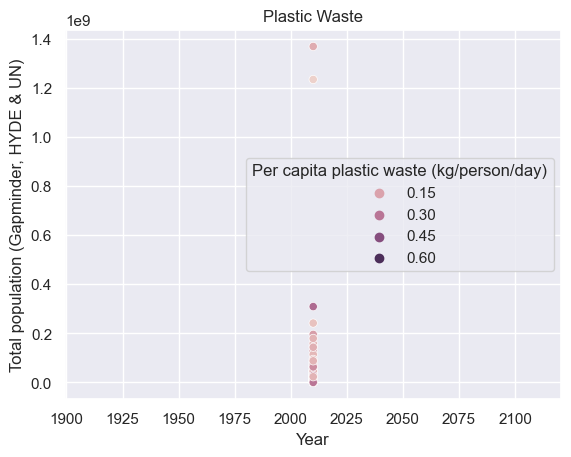

In [19]:
sns.scatterplot(x = GB_df["Year"], y = GB_df["Total population (Gapminder, HYDE & UN)"],
                hue = GB_df["Per capita plastic waste (kg/person/day)"], data = GB_df).set(title = "Plastic Waste");

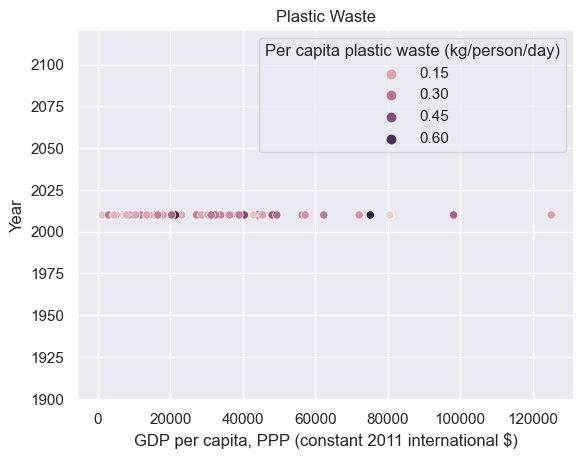

In [20]:
sns.scatterplot(x = GB_df["GDP per capita, PPP (constant 2011 international $)"], y = GB_df["Year"],
                hue = GB_df["Per capita plastic waste (kg/person/day)"], data = GB_df).set(title = "Plastic Waste");

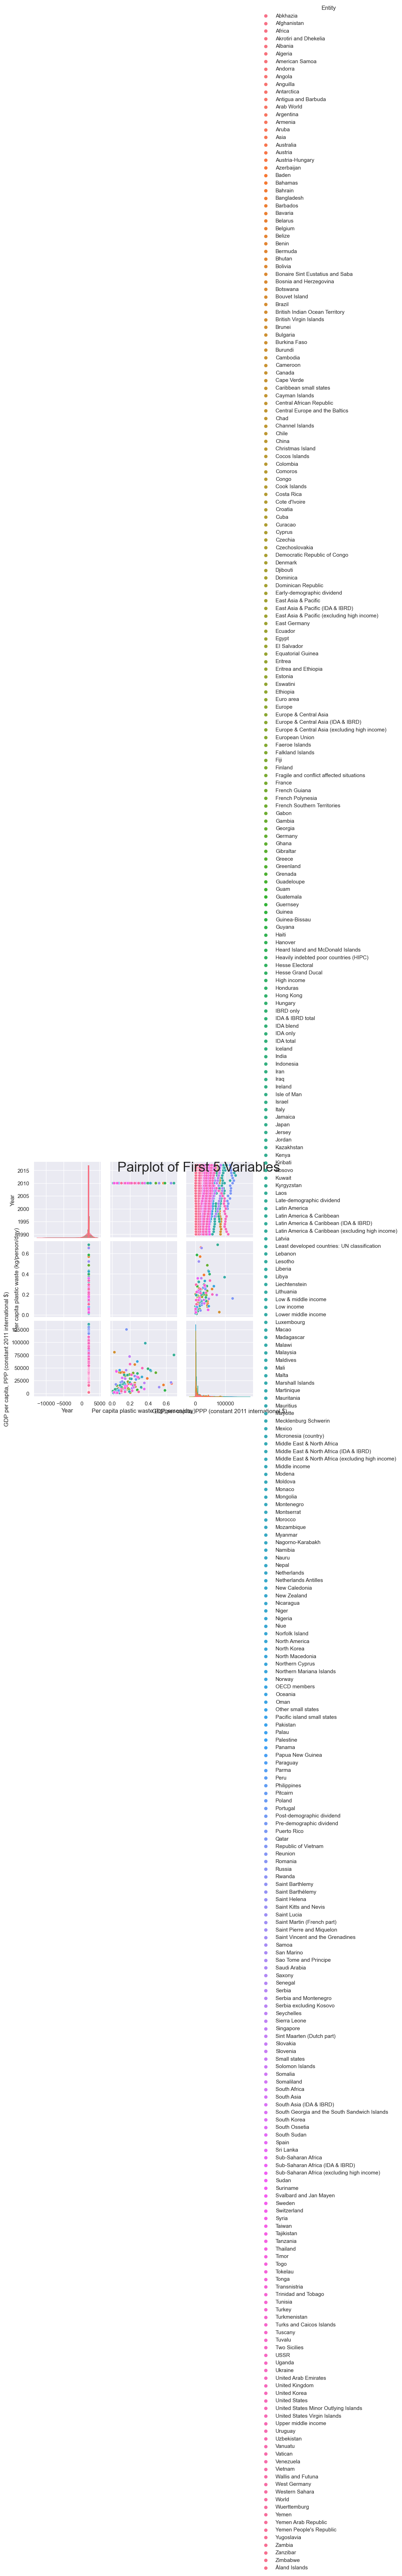

In [21]:
variables = GB_df.iloc[:, :5]
variables["Entity"] = GB_df["Entity"]
sns.pairplot(variables, hue = "Entity")
plt.suptitle("Pairplot of First 5 Variables", fontsize = 28)
plt.show()

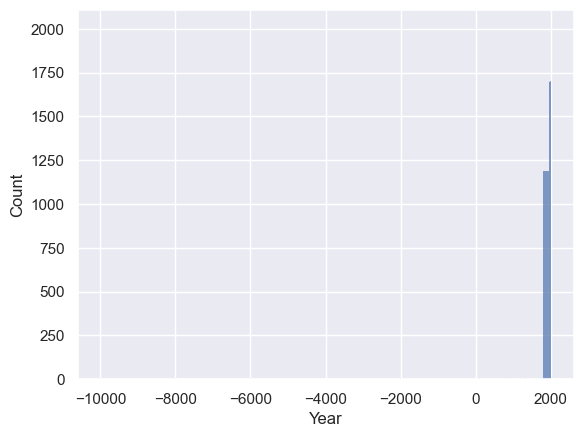

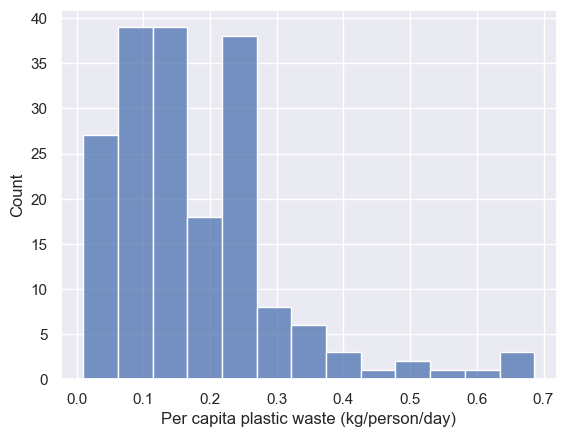

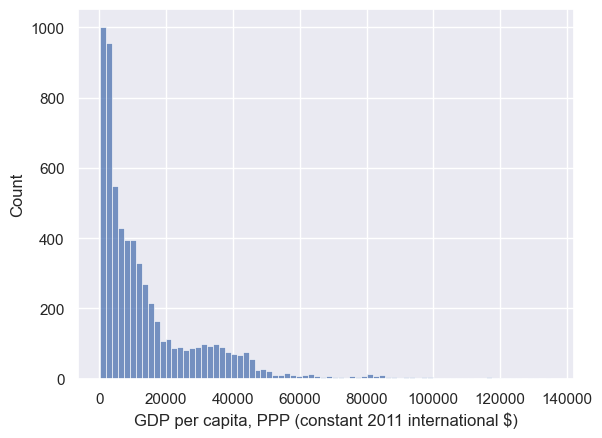

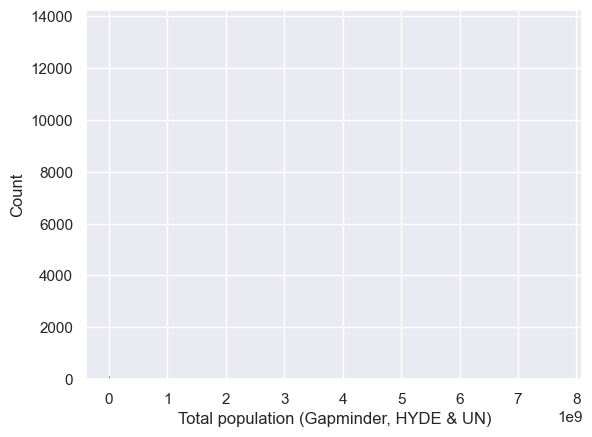

In [22]:
for i in GB_df.select_dtypes(include="number").columns:
    sns.histplot(data=GB_df, x=i)
    plt.show()

In [23]:
GB_df.iloc[:, :5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.8+ MB


## Exploring The Missing Values 

In [24]:
total_data = GB_df.size
total_missing_values = GB_df.isnull().sum().sum()

percentage_missing = (total_missing_values / total_data) * 100
print(f"Number of Missing Values: ", total_missing_values)
print(f"Percentage of Missing Values: {percentage_missing:.2f}%")

Number of Missing Values:  140925
Percentage of Missing Values: 41.80%


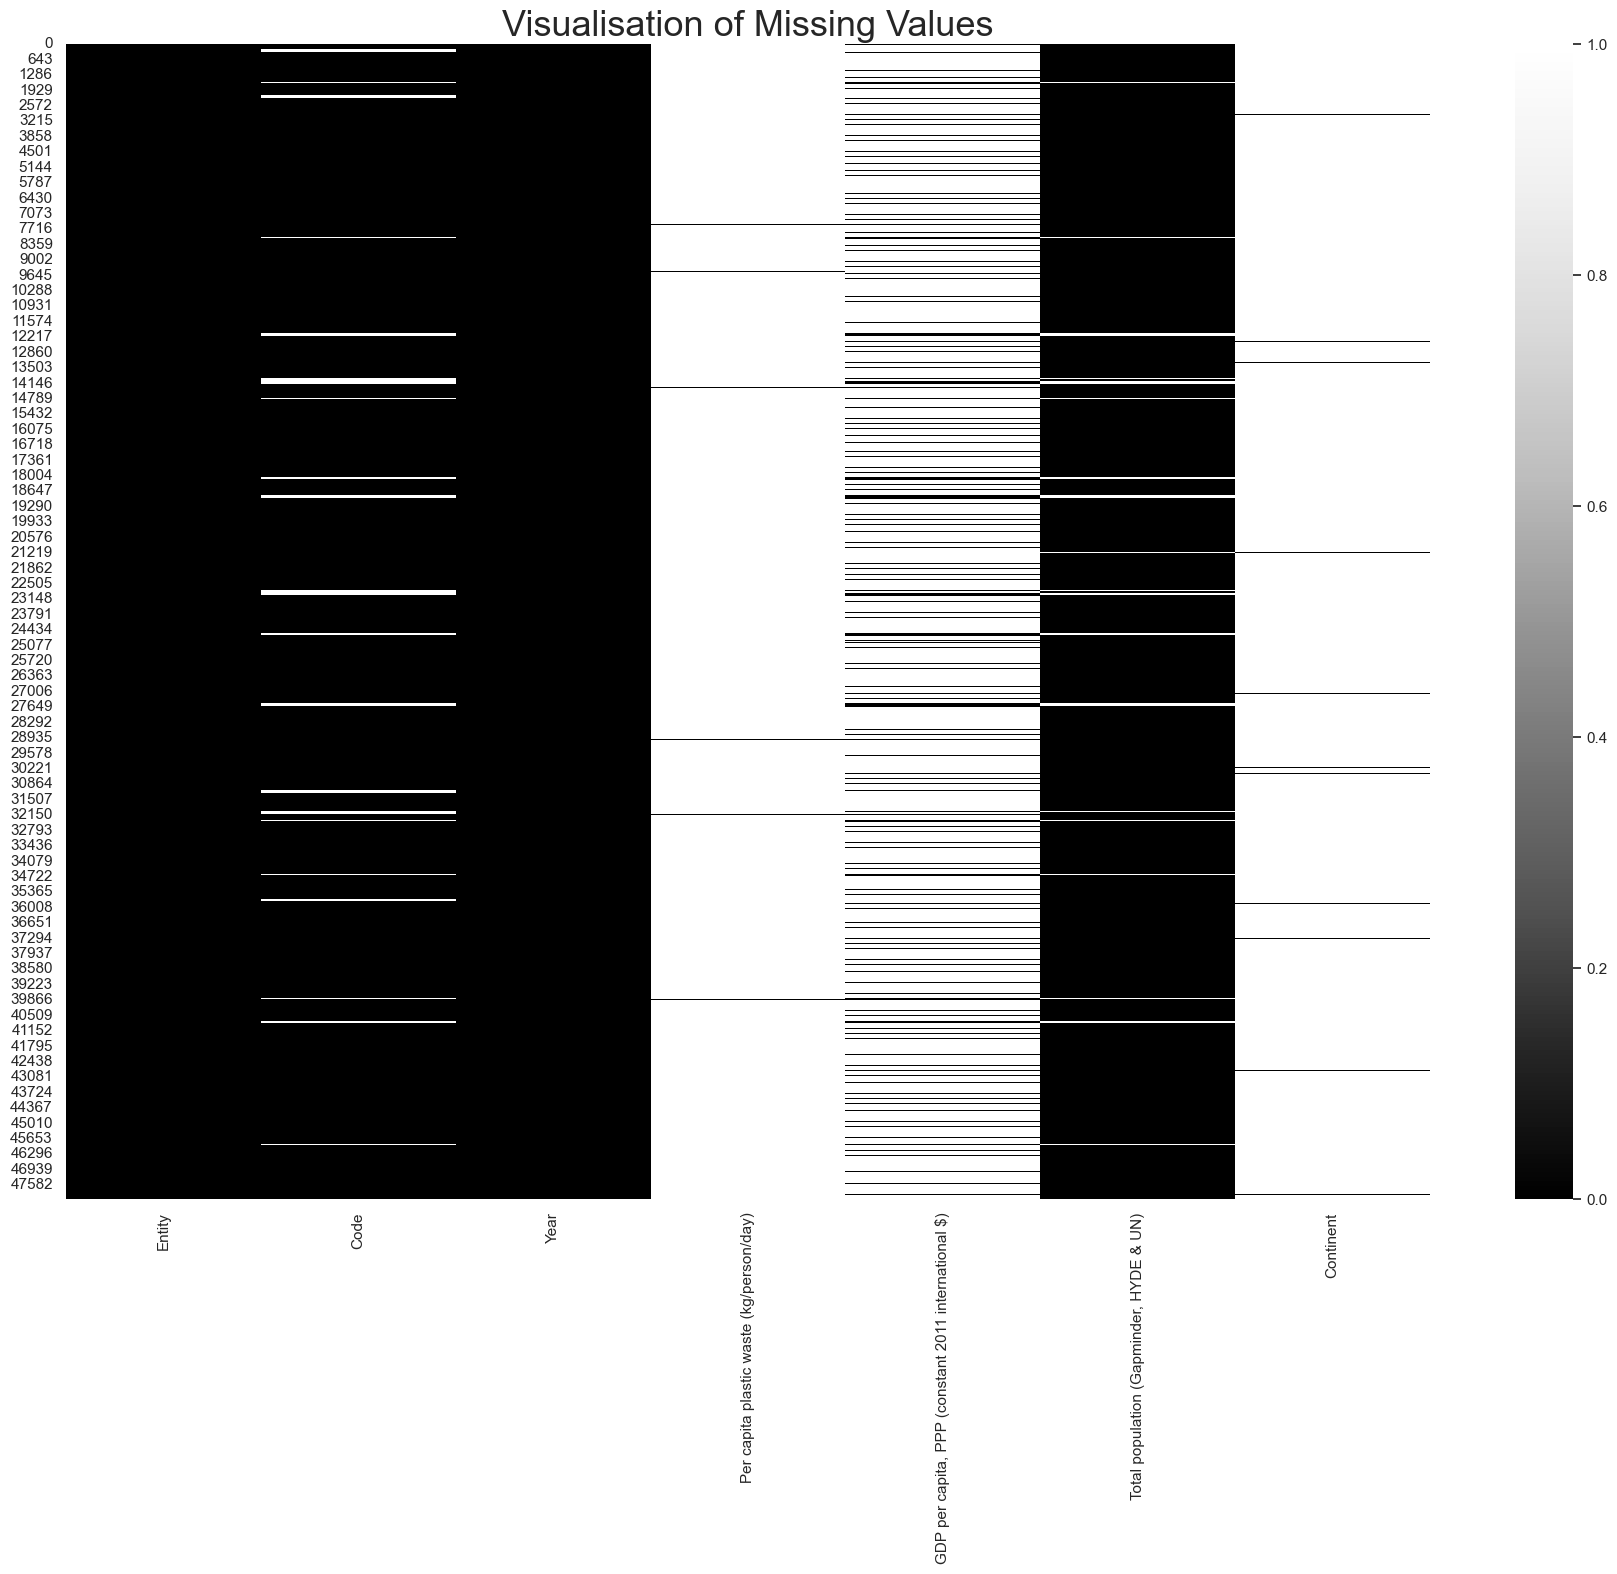

In [25]:
plt.figure(figsize = (22,15))
colourmap = sns.color_palette("Greys_r", as_cmap = True) #flare_r #cividis
sns.heatmap(GB_df.isnull(), cmap = colourmap)
plt.title("Visualisation of Missing Values", fontsize = 26)
plt.show()

In [26]:
total_data = GB_df.size
zero_count = (GB_df ==0).sum().sum()
percentage_zeros = (zero_count / total_data) * 100

print("Number of zeros in the DataFrame: ", zero_count)
print(f"Percentage of Zeros: {percentage_zeros:.2f}%")

Number of zeros in the DataFrame:  6
Percentage of Zeros: 0.00%


In [27]:
duplicate_rows = GB_df[GB_df.duplicated()]
duplicate_rows

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent


## NaN Count

In [28]:
import pandas as pd

#GB_df is a pandas DataFrame

NaN_counts = GB_df.isnull().sum(axis=1)
threshold = 0.9 * GB_df.shape[1]
rows_with_90_percent_NaN = NaN_counts[NaN_counts > threshold]

print(f"Number of rows with more than 90% NaN values: {len(rows_with_90_percent_NaN)}")

list_of_rows = rows_with_90_percent_NaN.index.tolist()
print("List of rows with more than 90% NaN values:")
print(list_of_rows)

Number of rows with more than 90% NaN values: 0
List of rows with more than 90% NaN values:
[]


### 90% NaN

In [29]:
rows_90_percent_nan = GB_df.iloc[list_of_rows]
print(rows_90_percent_nan)

Empty DataFrame
Columns: [Entity, Code, Year, Per capita plastic waste (kg/person/day), GDP per capita, PPP (constant 2011 international $), Total population (Gapminder, HYDE & UN), Continent]
Index: []


In [30]:
(0 / 48168) * 100

0.0

In summary, the code provides a visual representation of missing values in each feature, highlighting those that exceed a defined threshold.

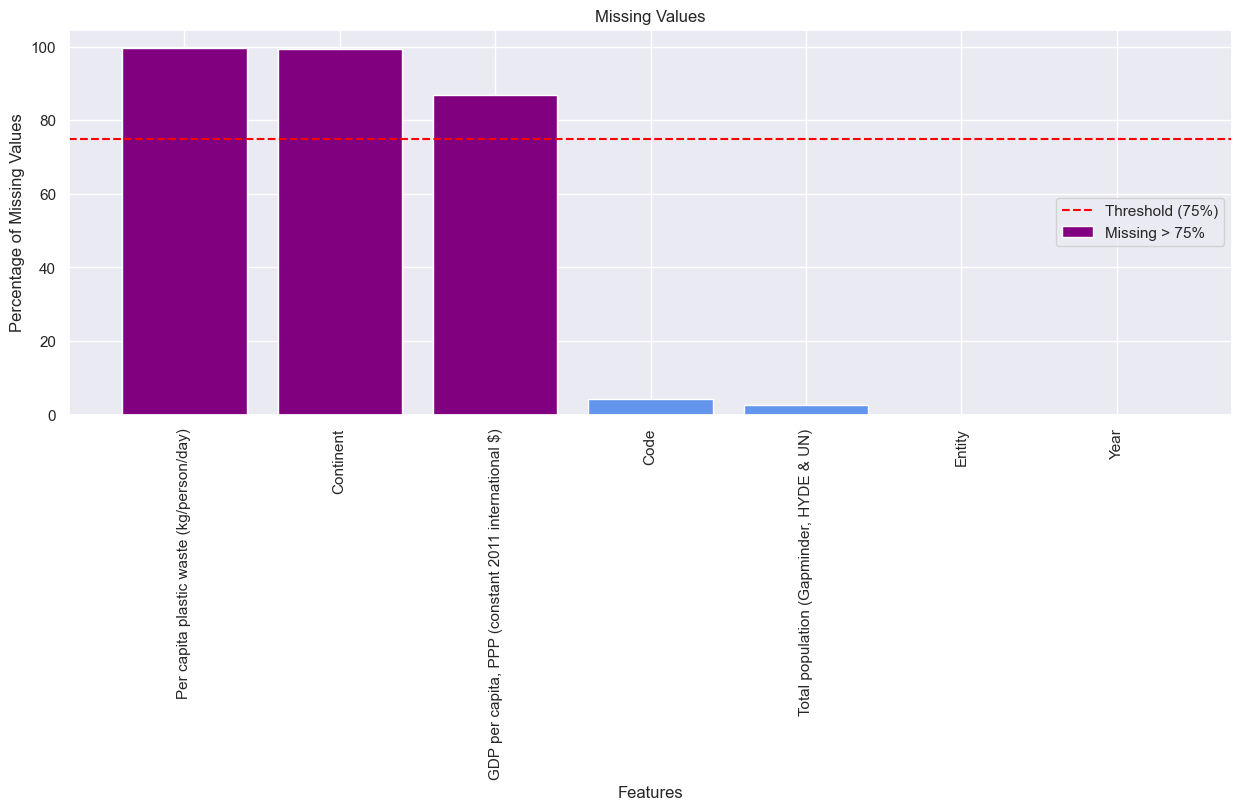

In [32]:
missing_values_percentage = GB_df.isna().sum() / len(GB_df) * 100
missing_values_percentage = missing_values_percentage.sort_values(ascending = False)
highlight_threshold = 75

fig, ax = plt.subplots(figsize=(15, 5))
bar_color = "cornflowerblue"
highlight_color = "purple"

ax.bar(missing_values_percentage.index, missing_values_percentage, color = bar_color)
ax.bar(missing_values_percentage.index[missing_values_percentage > highlight_threshold],
       missing_values_percentage[missing_values_percentage > highlight_threshold],
       color = highlight_color, label = f"Missing > {highlight_threshold}%")
ax.axhline(y = highlight_threshold, color = "red", linestyle = "--", label = f"Threshold ({highlight_threshold}%)")

plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values")
plt.legend(loc = "center right")
plt.show()

## Exploring the Variables with The Most Missing Data

In [33]:
miss_percent = (GB_df.isnull().sum() / len(GB_df)) * 100
var_75_plus_miss = miss_percent[miss_percent > 75].index.tolist()
print(var_75_plus_miss)

['Per capita plastic waste (kg/person/day)', 'GDP per capita, PPP (constant 2011 international $)', 'Continent']


## Removing Variables with more than 75% Missing Values

In [34]:
GB_df.shape

(48168, 7)

In [35]:
GB_df = GB_df.drop(columns = var_75_plus_miss)

In [36]:
GB_df.shape

(48168, 4)

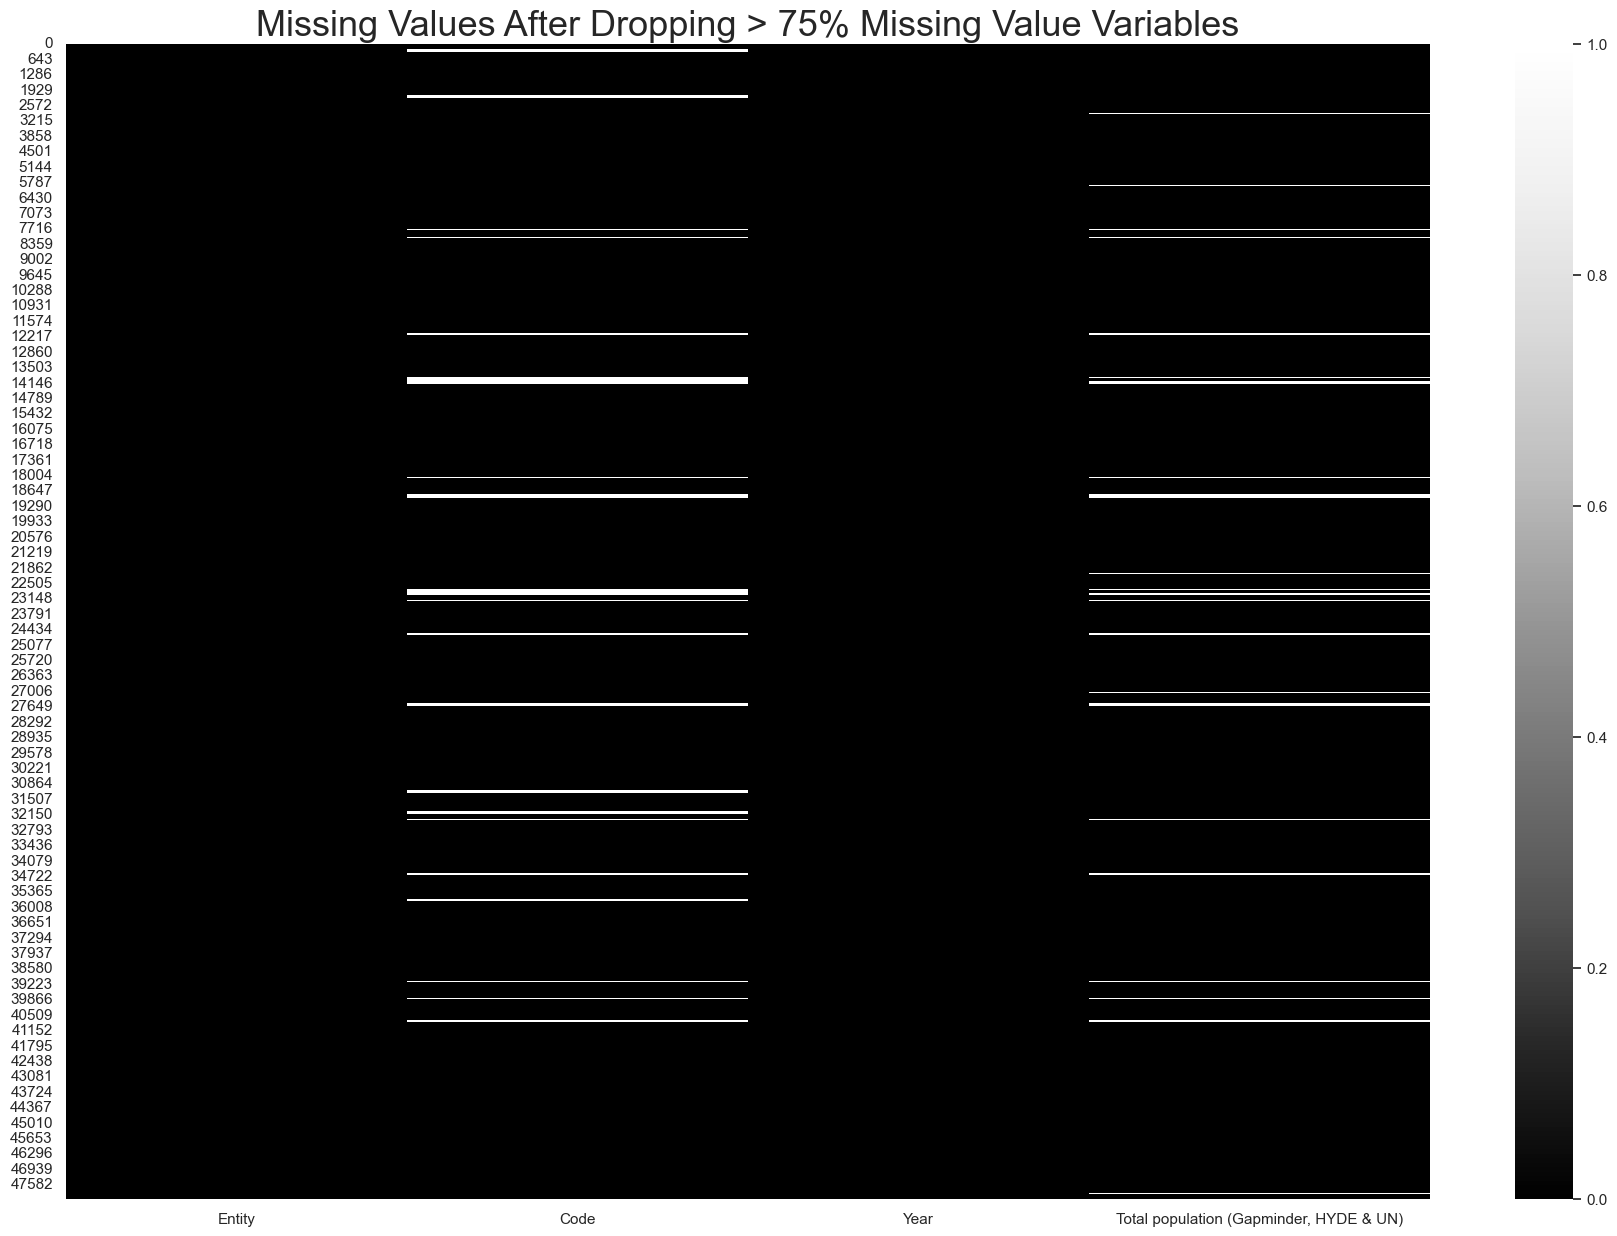

In [37]:
plt.figure(figsize = (22,15))
colourmap = sns.color_palette("Greys_r", as_cmap = True) #flare_r #cividis
sns.heatmap(GB_df.isnull(), cmap = colourmap)
plt.title("Missing Values After Dropping > 75% Missing Value Variables", fontsize = 26)
plt.show()

## Exploring Median and Min_Max Values

In [38]:
def summarise_variables(GB_df):
    summary = pd.DataFrame(columns = ["Variable", "Median", "Min", "Max"])
    
    for column in GB_df.columns:
        if pd.api.types.is_numeric_dtype(GB_df[column]):
            median = GB_df[column].median()
            minimum = GB_df[column].min()
            maximum = GB_df[column].max()
            new_row = pd.DataFrame({"Variable": column, "Median": median,
                                      "Min" : minimum, "Max": maximum}, index = [0])
            summary = pd.concat([summary, new_row], ignore_index = True)
    return summary

In [39]:
summary = summarise_variables(GB_df)
pd.options.display.max_rows = None
print(summary)

                                  Variable     Median     Min           Max
0                                     Year     1920.0  -10000          2019
1  Total population (Gapminder, HYDE & UN)  1542937.0   905.0  7713467904.0


In [42]:
summary.head()

,Variable,Median,Min,Max
0,Year,1920.0,-10000,2019
1,"Total population (Gapminder, HYDE & UN)",1542937.0,905.0,7713467904.0


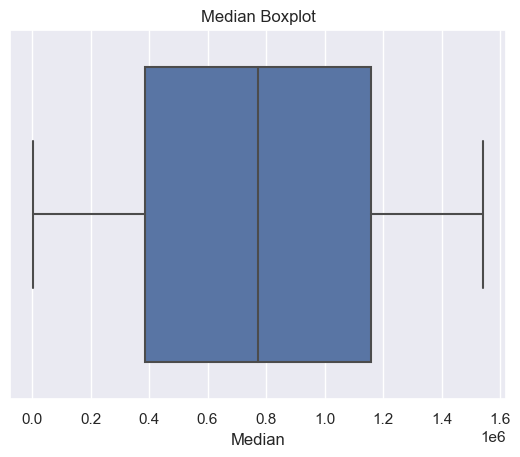

In [43]:
median_boxplot = sns.boxplot(x = summary["Median"])
median_boxplot.set_title("Median Boxplot")
plt.show();

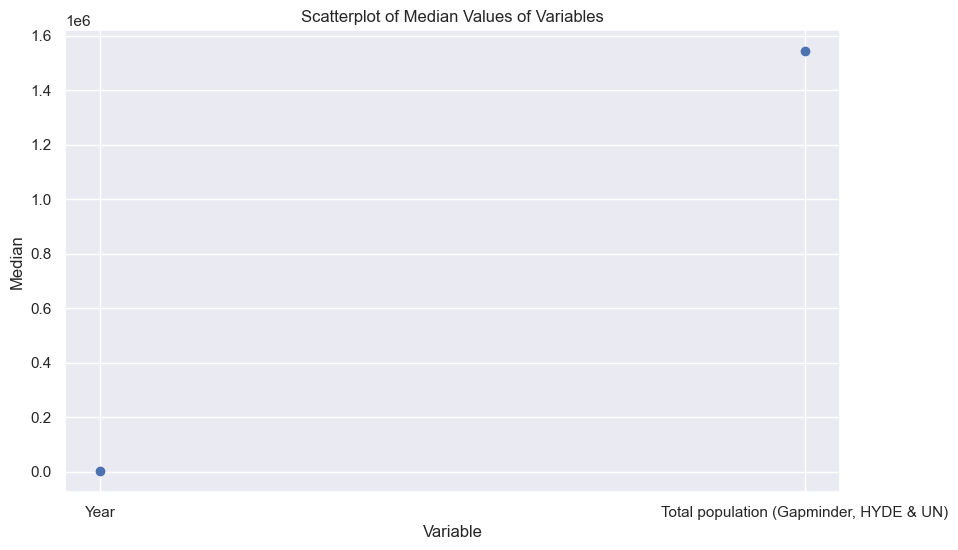

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(summary["Variable"], summary["Median"])
ax.set_xlabel("Variable")
ax.set_ylabel("Median")
ax.set_title("Scatterplot of Median Values of Variables")
plt.show();

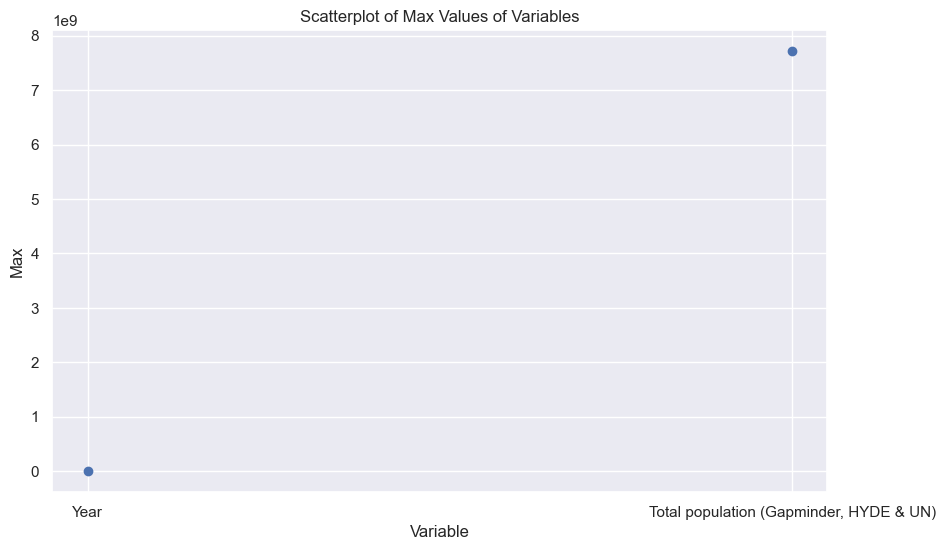

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(summary["Variable"], summary["Max"])
ax.set_xlabel("Variable")
ax.set_ylabel("Max")
ax.set_title("Scatterplot of Max Values of Variables")
plt.show();

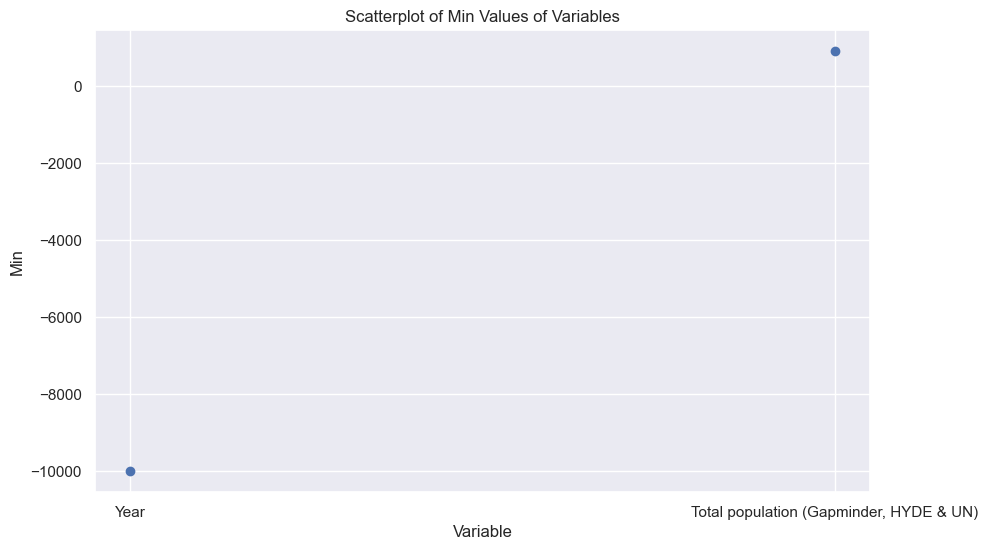

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(summary["Variable"], summary["Min"])
ax.set_xlabel("Variable")
ax.set_ylabel("Min")
ax.set_title("Scatterplot of Min Values of Variables")
plt.show();

In [47]:
GB_df.isnull().sum().sum()

3299

In [48]:
GB_percent = ((140925 - 3299)/140925) * 100
print("Percent of Missing Values Dropped: ", GB_percent)
total_data = GB_df.size
total_missing_values = GB_df.isnull().sum().sum()

percentage_missing = (total_missing_values / total_data) * 100
print(f"Number of Missing Values Currently: ", total_missing_values)
print(f"Percentage of Missing Values: {percentage_missing:.2f}%")

Percent of Missing Values Dropped:  97.65903849565372
Number of Missing Values Currently:  3299
Percentage of Missing Values: 1.71%


In [49]:
GB_df.isnull().sum()

Entity                                        0
Code                                       2014
Year                                          0
Total population (Gapminder, HYDE & UN)    1285
dtype: int64

## Exploring Target Variable

In [50]:
GB_df["Entity"].value_counts()

Entity
Lithuania                                             220
Nigeria                                               220
Luxembourg                                            220
Madagascar                                            220
Malawi                                                220
Malaysia                                              220
Maldives                                              220
Mali                                                  220
Malta                                                 220
Marshall Islands                                      220
Mauritania                                            220
Mauritius                                             220
Uzbekistan                                            220
Mexico                                                220
Micronesia (country)                                  220
Uruguay                                               220
Moldova                                               220
Monaco 

In [51]:
GB_df["Year"].value_counts()

Year
 2015     337
 2010     292
 2011     287
 2000     287
 2001     287
 2002     287
 2017     287
 2016     287
 2014     287
 2012     287
 2013     287
 2009     287
 2008     287
 2007     287
 2006     287
 2005     287
 2004     287
 2003     287
 1996     284
 1990     284
 1991     284
 1992     284
 1993     284
 1994     284
 1995     284
 1997     284
 1998     284
 1999     284
 1972     242
 1960     242
 1970     242
 1969     242
 1968     242
 1967     242
 1966     242
 1965     242
 1964     242
 1962     242
 1961     242
 1958     242
 1959     242
 1952     242
 1957     242
 1956     242
 1955     242
 1954     242
 1953     242
 1950     242
 1951     242
 1971     242
 1963     242
 1973     242
 1981     242
 1974     242
 1989     242
 1988     242
 1987     242
 1986     242
 1985     242
 1984     242
 1983     242
 2019     242
 1982     242
 1980     242
 1979     242
 1978     242
 1977     242
 1976     242
 1975     242
 2018     242
 1900     204
 

In [52]:
GB_df["Total population (Gapminder, HYDE & UN)"].value_counts()

Total population (Gapminder, HYDE & UN)
2.000000e+03    160
6.000000e+03    145
5.000000e+03    128
1.000000e+03     90
8.000000e+03     80
7.000000e+03     80
3.700000e+04     77
9.000000e+03     74
1.000000e+04     71
1.100000e+04     71
8.600000e+04     66
2.400000e+04     64
1.200000e+04     63
1.400000e+04     62
1.800000e+04     61
3.000000e+03     58
1.210000e+05     58
2.290000e+05     57
7.470000e+05     54
9.050000e+02     54
3.000000e+04     53
2.000000e+04     53
7.370000e+05     53
1.432000e+06     52
6.447400e+04     52
1.409200e+04     51
8.128000e+04     51
4.015300e+04     51
2.574000e+06     51
1.500000e+04     49
2.900000e+04     49
1.900000e+04     48
5.600000e+04     48
5.700000e+04     42
2.099540e+05     41
6.400000e+04     41
1.659440e+05     41
5.500000e+04     38
3.400000e+04     38
1.300000e+04     38
2.300000e+04     38
6.000000e+04     38
9.140000e+02     37
6.200000e+04     37
4.800000e+04     36
1.000000e+05     36
1.080000e+05     35
3.300000e+04     35


In [53]:
GB_df["Entity"].isnull().sum()

0

In [54]:
GB_df["Year"].isnull().sum()

0

In [55]:
GB_df["Total population (Gapminder, HYDE & UN)"].isnull().sum()

1285

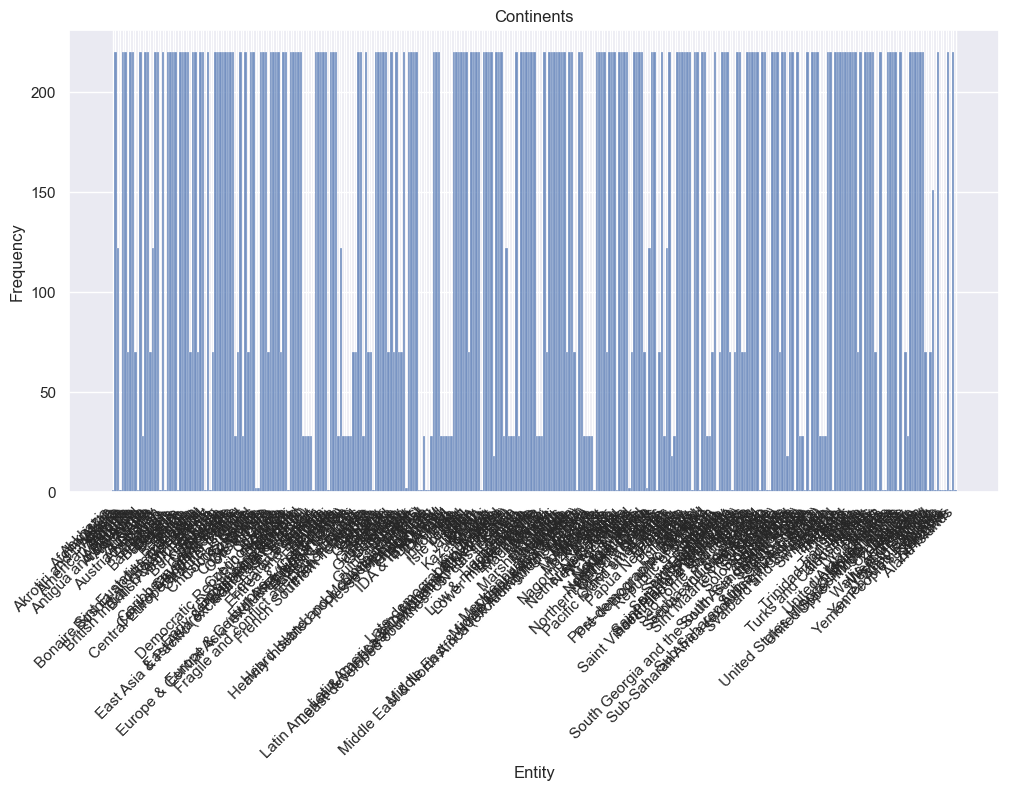

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))

# Plot the histogram with rotated x-axis labels and adjusted bins
sns.histplot(GB_df["Entity"], bins=20, kde=False)
plt.title("Continents")
plt.xlabel("Entity")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right") 
plt.show()

### Scaling the Data

In [57]:
X = GB_df.drop("Entity", axis = 1)
y = GB_df["Entity"]

In [58]:
print("Variable dataset to be scaled: ", X.shape)
print("Target Variable - Entity: ", y.shape)
print("Target Variable - Year: ", y.shape)

Variable dataset to be scaled:  (48168, 3)
Target Variable - Entity:  (48168,)
Target Variable - Year:  (48168,)


## Ecoding Data:

In [59]:
X_encoded = pd.get_dummies(X)

In [60]:
X_numeric = X.select_dtypes(include=['number'])

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

# X is the feature matrix

# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

#Transformers for numeric and non-numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

#Column transformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('non_num', non_numeric_transformer, non_numeric_cols)
    ])

# Apply the preprocessing to data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the sparse matrix to a dense NumPy array
X_dense = X_preprocessed.toarray()

# Now, The RobustScaler with with_centering=False
scaler_robust = RobustScaler(with_centering=False)
X_robust = scaler_robust.fit_transform(X_dense)


In [62]:
print("Transformed Data:")
print(X_robust[:100, :])  # Print the first 5 rows

Transformed Data:
[[ 0.96424619  0.          0.         ...  0.          0.
   0.        ]
 [ 0.85217722 -1.09874187  0.         ...  0.          0.
   0.        ]
 [ 0.86079791 -0.93454398  0.         ...  0.          0.
   0.        ]
 ...
 [-0.19954692 -3.86293808  0.         ...  0.          0.
   0.        ]
 [-0.19092623 -3.85871393  0.         ...  0.          0.
   0.        ]
 [-0.18230554 -3.85437014  0.         ...  0.          0.
   0.        ]]


In [63]:
import pandas as pd

GB_df = pd.DataFrame(GB_df, columns=GB_df.columns)  

print(GB_df.head())

        Entity      Code  Year  Total population (Gapminder, HYDE & UN)
0     Abkhazia  OWID_ABK  2015                                      NaN
1  Afghanistan       AFG  2002                               22601000.0
2  Afghanistan       AFG  2003                               23681000.0
3  Afghanistan       AFG  2004                               24727000.0
4  Afghanistan       AFG  2005                               25654000.0


In [64]:
column_names = GB_df.columns
print(column_names)

Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)'], dtype='object')


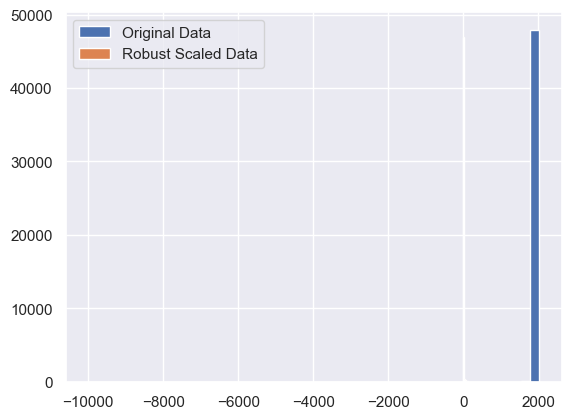

In [65]:
import matplotlib.pyplot as plt

#specific feature by column name
feature_name = "Year" 

# Find the index of the chosen feature in the original DataFrame
feature_index = X.columns.get_loc(feature_name)

# Plot histograms of original and transformed data for the chosen feature
plt.hist(X.iloc[:, feature_index], bins=50, label='Original Data')
plt.hist(X_robust[:, feature_index], bins=50, label='Robust Scaled Data')
plt.legend()
plt.show()
